## Kernel Density Estimation

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from typing import *
import torch
import math

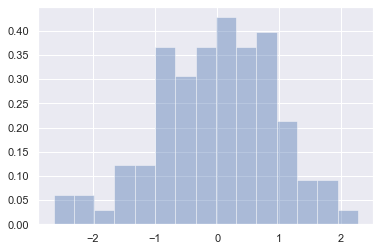

In [12]:
sample = np.random.randn(100)

sns.distplot(sample, kde=False, bins=15, norm_hist=True)
plt.show()

##  Rosenblatt Histogram Estimation

In [13]:
def kernel_density(K, sample, h):
    
    sample = np.array(sample)
    f = lambda y: np.mean(np.vectorize(K)((y - sample)/h)) / h
    return np.vectorize(f)


In [14]:
y = np.arange(-2, 2, 0.01)

In [15]:

func = kernel_density(lambda x: int(abs(x) <= 1/2), sample, h=1)



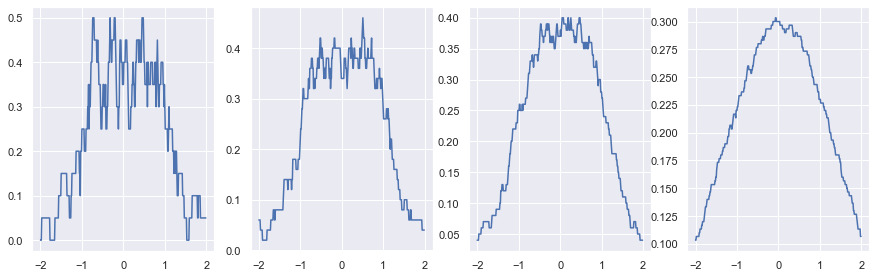

In [16]:
plt.figure(  figsize=(15, 4.5)  )

for i, h in enumerate([0.2, 0.5, 1, 3]):
    plt.subplot(1, 4, i + 1)
    func = kernel_density(lambda x: int(abs(x) <= 1/2), sample, h=h)
    plt.plot(y, func(y))
plt.show()


## Gauss Kernel Density Estimation

In [17]:
def kernel_density(K, sample, h):
    
    sample = np.array(sample)
    
    f = lambda y: np.mean(
                    np.vectorize(K)     ((y - sample)/h)
        ) / h
    
    return np.vectorize(f)

In [18]:
y = np.arange(-2, 2, 0.01)

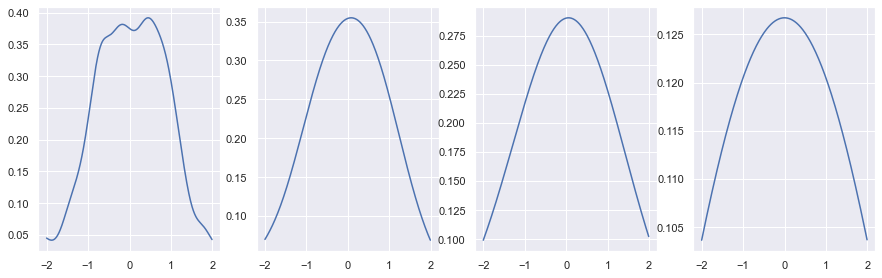

In [19]:

K = lambda x: 1 * np.exp(-x**2/2) / np.sqrt(2 * np.pi)


plt.figure(  figsize=(15, 4.5)  )
for i, h in enumerate([0.2, 0.6, 1, 3]):
    plt.subplot(1, 4, i + 1)
    func = kernel_density(K, sample, h=h)
    plt.plot(y, func(y))
plt.show()

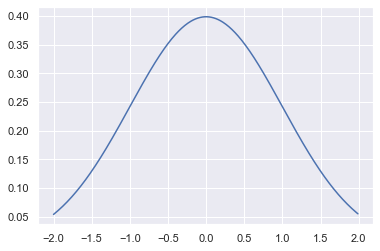

In [20]:
plt.plot(y, stats.norm.pdf(y)); plt.show()

## Quadratic Kernel

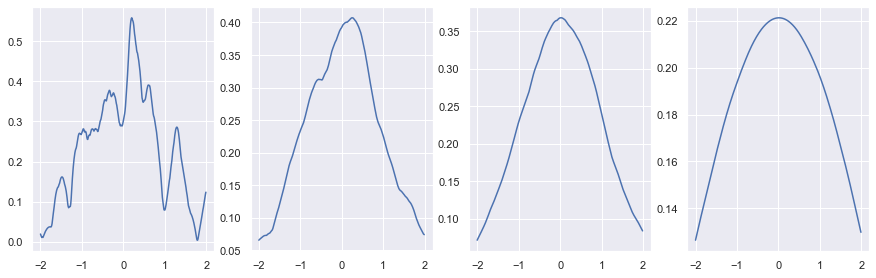

In [38]:
K = lambda x: 3/4 * (1 - x**2) * (abs(x) <= 1)

func = kernel_density(K, sample, h=1)

plt.figure(  figsize=(15, 4.5)  )
for i, h in enumerate([0.2, 0.6, 1, 3]):
    plt.subplot(1, 4, i + 1)
    func = kernel_density(K, sample, h=h)
    plt.plot(y, func(y))
plt.show()

## One sided tail distributions

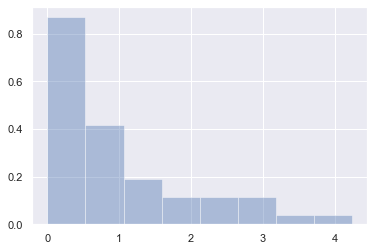

In [39]:
sample = np.random.exponential(size=100)

sns.distplot(sample,  norm_hist=True, kde=False)
plt.show()

In [40]:
y = np.arange(-1, 7, 0.05)

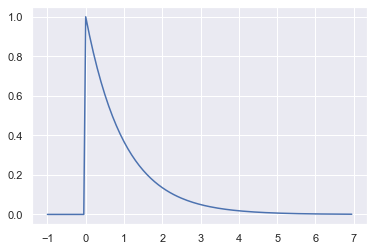

In [41]:
plt.plot(y, stats.expon.pdf(y))

In [42]:
K = lambda x: 3/4 * (1 - x**2) * (abs(x) <= 1)

func = kernel_density(K, sample, h=1)



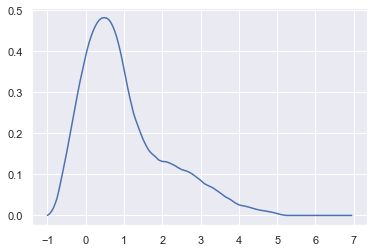

In [43]:
plt.plot(y, func(y))

## Impulse Function

In [43]:
def ImpulseGaussian(x, mu, sigma): 
   
    left  = 1 / (    torch.sqrt(   2 * torch.tensor(math.pi)   ) * torch.sqrt(torch.tensor(sigma) )    )
    
    right = torch.exp(   -(x - mu)**2 / (2 * sigma)    )
    
    vector_vals = left * right
    
    return vector_vals         ## .unsqueeze(0)

In [44]:

N_error_range = 20

x = torch.arange(-N_error_range, N_error_range, 0.01) 

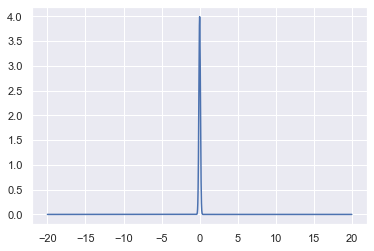

In [46]:
mu = 0.0
sigma  = 0.01

y = ImpulseGaussian(x, mu, sigma)

plt.plot(x, y)

## Non Lambda Kernel Density

In [127]:
def kernel_density2(x_range, the_errors, h): 
    
    ## x_range = x_range.unsqueeze(0)
   
    ## this is necessary to give all errors as a column vector
    ## when training the NN with one output, the batch is the column vector
    
    the_errors = the_errors.unsqueeze(1)     
    
    print(the_errors.shape)
    print(x_range.shape)
    
    
    left  = 1 / (    torch.sqrt(   2 * torch.tensor(math.pi)   )  )
    
    right = torch.exp(   -((x_range - the_errors)/h)**2 / (2)    )
    
    vector_vals = left * right
    
    print(vector_vals.shape)
    print('***********')
    
    density         = torch.mean( vector_vals, 0) / h
             
    return density

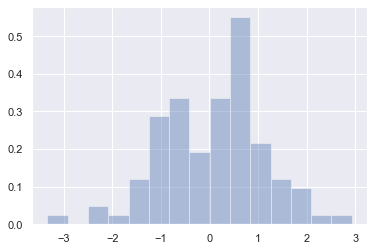

In [128]:
errors = torch.tensor(np.random.randn(100))

sns.distplot(errors, kde=False, bins=15, norm_hist=True)
plt.show()

In [129]:
def kernel_density(K, sample, h):
    

    
    f = lambda y: np.mean(
                    np.vectorize(K)     ((y - sample)/h)
        ) / h
    
    return np.vectorize(f)




In [130]:
N_error_range = 3

x = torch.arange(-N_error_range, N_error_range, 0.01) 



torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********
torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********
torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********
torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********
torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********
torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********
torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********
torch.Size([100, 1])
torch.Size([600])
torch.Size([100, 600])
***********


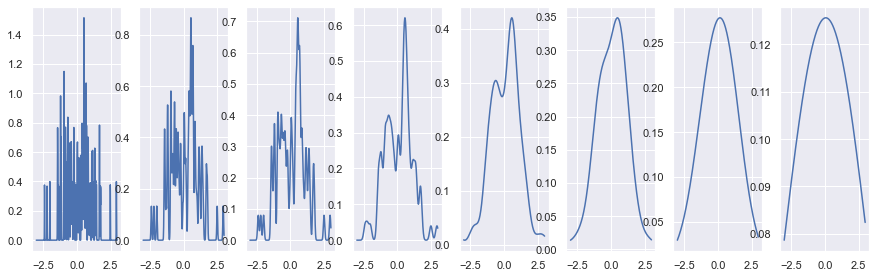

In [131]:
plt.figure(  figsize=(15, 4.5)  )

for i, h in enumerate([0.01, 0.03, 0.05, 0.1, 0.3, 0.5,  1, 3]):
    
    plt.subplot(1, 8, i + 1)
    
    y = kernel_density2(x, errors, h=h)
      
    plt.plot(x, y)
    
plt.show()